In [81]:
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt


In [2]:
os.getcwd()

'C:\\Users\\jo250854\\Desktop\\usa_vote'

Check directory, and check whats inside directory

In [43]:
os.listdir()

['.ipynb_checkpoints',
 'gadm36_USA_shp',
 'incarcerate.csv',
 'state_overall_2018.csv',
 'usa_vote.ipynb']

Load in tabular data, load in shapefile

In [69]:
state_votes = pd.read_csv('state_overall_2018.csv', encoding='latin-1')

In [70]:
usa = gpd.read_file('gadm36_USA_shp/gadm36_USA_1.shp')

<IPython.core.display.Javascript object>


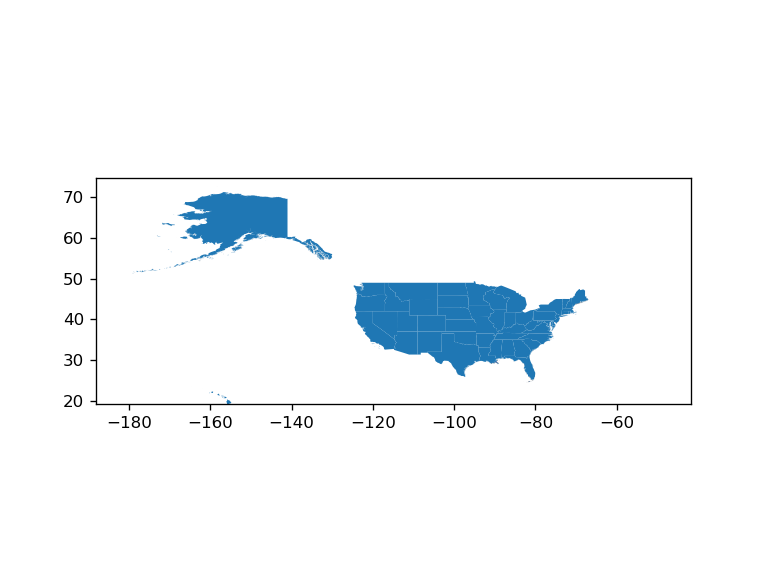

In [25]:
usa.plot()

In [34]:
usa.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,USA,United States,USA.1_1,Alabama,AL|Ala.,None,State,State,None,US.AL,"(POLYGON ((-87.97000122 30.67666626, -87.96971..."
1,USA,United States,USA.2_1,Alaska,AK|Alaska,None,State,State,None,US.AK,"(POLYGON ((-179.13146973 51.20972061, -179.132..."
2,USA,United States,USA.3_1,Arizona,AZ|Ariz.,None,State,State,None,US.AZ,"POLYGON ((-110.82376099 31.33125305, -110.8260..."
3,USA,United States,USA.4_1,Arkansas,AR|Ark.,None,State,State,None,US.AR,"POLYGON ((-92.72460937 33.01473999, -92.861946..."
4,USA,United States,USA.5_1,California,CA|Calif.,None,State,State,None,US.CA,"(POLYGON ((-118.58975983 33.0386467, -118.5897..."


In [26]:
state_votes

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
0,2018,Alabama,AL,1,63,41,"Associate Justice of the Supreme Court, Place 1",statewide,gen,False,NaN,NaN,True,absentee,646.0,1705793.0,False,20190430
1,2018,Alabama,AL,1,63,41,"Associate Justice of the Supreme Court, Place 1",statewide,gen,False,NaN,NaN,True,election day,34493.0,1705793.0,False,20190430
2,2018,Alabama,AL,1,63,41,"Associate Justice of the Supreme Court, Place 1",statewide,gen,False,NaN,NaN,True,provisional,133.0,1705793.0,False,20190430
3,2018,Alabama,AL,1,63,41,"Associate Justice of the Supreme Court, Place 1",statewide,gen,False,Over Votes,NaN,False,absentee,8.0,1705793.0,False,20190430
4,2018,Alabama,AL,1,63,41,"Associate Justice of the Supreme Court, Place 1",statewide,gen,False,Over Votes,NaN,False,election day,241.0,1705793.0,False,20190430
5,2018,Alabama,AL,1,63,41,"Associate Justice of the Supreme Court, Place 1",statewide,gen,False,Over Votes,NaN,False,provisional,1.0,1705793.0,False,20190430
6,2018,Alabama,AL,1,63,41,"Associate Justice of the Supreme Court, Place 1",statewide,gen,False,Sarah Hicks Stewart,republican,False,absentee,32836.0,1705793.0,False,20190430
7,2018,Alabama,AL,1,63,41,"Associate Justice of the Supreme Court, Place 1",statewide,gen,False,Sarah Hicks Stewart,republican,False,election day,1060731.0,1705793.0,False,20190430
8,2018,Alabama,AL,1,63,41,"Associate Justice of the Supreme Court, Place 1",statewide,gen,False,Sarah Hicks Stewart,republican,False,provisional,3568.0,1705793.0,False,20190430
9,2018,Alabama,AL,1,63,41,"Associate Justice of the Supreme Court, Place 1",statewide,gen,False,Under Votes,NaN,False,absentee,20524.0,1705793.0,False,20190430


Limit tabular data to make it cross-sectional

In [29]:
state_rep = state_votes.loc[state_votes.district == "statewide"]
to_keep = ['totalvotes', 'state', 'state_po']
state_small = state_rep[to_keep]

In [32]:
state_cross = state_small.drop_duplicates(subset=['state'], keep='last')

In [33]:
state_cross

,totalvotes,state,state_po
2138,1705343.0,Alabama,AL
2143,283134.0,Alaska,AK
2480,2299427.0,Arizona,AZ
3028,862132.0,Arkansas,AR
3247,24404806.0,California,CA
3456,2474397.0,Colorado,CO
3481,1367676.0,Connecticut,CT
4275,8220561.0,Florida,FL
4692,357542.0,Delaware,DE
6098,3862818.0,Georgia,GA


Replace the string to make it pretty

In [39]:
usa['state_po'] = usa['HASC_1'].str.replace("US.", "")

In [40]:
usa.state_po

0     AL
1     AK
2     AZ
3     AR
4     CA
5     CO
6     CT
7     DE
8     DC
9     FL
10    GA
11    HI
12    ID
13    IL
14    IN
15    IA
16    KS
17    KY
18    LA
19    ME
20    MD
21    MA
22    MI
23    MN
24    MS
25    MO
26    MT
27    NE
28    NV
29    NH
30    NJ
31    NM
32    NY
33    NC
34    ND
35    OH
36    OK
37    OR
38    PA
39    RI
40    SC
41    SD
42    TN
43    TX
44    UT
45    VT
46    VA
47    WA
48    WV
49    WI
50    WY
Name: state_po, dtype: object

Merge data

In [41]:
state_merged = usa.merge(state_cross, on='state_po', how='left')

In [42]:
state_merged.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry,state_po,totalvotes,state
0,USA,United States,USA.1_1,Alabama,AL|Ala.,None,State,State,None,US.AL,"(POLYGON ((-87.97000122 30.67666626, -87.96971...",AL,1705343.0,Alabama
1,USA,United States,USA.2_1,Alaska,AK|Alaska,None,State,State,None,US.AK,"(POLYGON ((-179.13146973 51.20972061, -179.132...",AK,283134.0,Alaska
2,USA,United States,USA.3_1,Arizona,AZ|Ariz.,None,State,State,None,US.AZ,"POLYGON ((-110.82376099 31.33125305, -110.8260...",AZ,2299427.0,Arizona
3,USA,United States,USA.4_1,Arkansas,AR|Ark.,None,State,State,None,US.AR,"POLYGON ((-92.72460937 33.01473999, -92.861946...",AR,862132.0,Arkansas
4,USA,United States,USA.5_1,California,CA|Calif.,None,State,State,None,US.CA,"(POLYGON ((-118.58975983 33.0386467, -118.5897...",CA,24404806.0,California


In [64]:
incarcerate = pd.read_csv('incarcerate.csv', encoding='latin-1')

In [65]:
incarcerate.head()

,state,total_prison,adult_rate_100,rate_100
0,Alabama,"40,900","1,080",840
1,Alaska,"4,400",800,600
2,Arizona,"55,000","1,030",790
3,Arkansas,"24,000","1,050",800
4,California,"202,700",670,510


Fix incarceration state name variable.

In [66]:
incarcerate.state = incarcerate.state.str.strip()
incarcerate.state.value_counts()

Vermont           1
Florida           1
Colorado          1
Hawaii            1
Oregon            1
Massachusetts     1
Arizona           1
Oklahoma          1
Ohio              1
Minnesota         1
California        1
Illinois          1
Rhode Island      1
Montana           1
Delaware          1
West Virginia     1
Missouri          1
Washington        1
Connecticut       1
Texas             1
North Carolina    1
Kentucky          1
Louisiana         1
South Carolina    1
Nebraska          1
Maryland          1
Maine             1
North Dakota      1
Wisconsin         1
Virginia          1
Kansas            1
South Dakota      1
Mississippi       1
Michigan          1
Georgia           1
New Jersey        1
Iowa              1
New Hampshire     1
New York          1
Idaho             1
Arkansas          1
Utah              1
Wyoming           1
Tennessee         1
Alaska            1
Indiana           1
Alabama           1
New Mexico        1
Pennsylvania      1
Nevada            1


In [67]:
incar_merge = state_merged.merge(incarcerate, left_on='NAME_1', right_on='state', how='left')

In [68]:
incar_merge.tail()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry,state_po,totalvotes,state_x,state_y,total_prison,adult_rate_100,rate_100
46,USA,United States,USA.47_1,Virginia,VA,None,State,State,None,US.VA,"(POLYGON ((-75.90833282 36.5597229, -75.907775...",VA,NaN,NaN,Virginia,"57,500",880,680.0
47,USA,United States,USA.48_1,Washington,WA|Wash.,None,State,State,None,US.WA,"(POLYGON ((-122.32476807 45.56042099, -122.322...",WA,2005244.0,Washington,Washington,"30,400",530,410.0
48,USA,United States,USA.49_1,West Virginia,WV|W.Va.,None,State,State,None,US.WV,"POLYGON ((-80.30742644999999 37.68952942, -80....",WV,505716.0,West Virginia,West Virginia,"10,100",690,550.0
49,USA,United States,USA.50_1,Wisconsin,WI|Wis.,None,State,State,None,US.WI,"POLYGON ((-89.92558289 42.50751114, -89.957298...",WI,2601962.0,Wisconsin,Wisconsin,"35,600",790,620.0
50,USA,United States,USA.51_1,Wyoming,WY|Wyo.,None,State,State,None,US.WY,"POLYGON ((-110.04850006 40.99882889, -110.0572...",WY,205275.0,Wyoming,Wyoming,"3,900",870,660.0


In [95]:
incar_merge['totalvotes'] = incar_merge['totalvotes'].replace(np.nan, 0)
incar_merge['total_prison'] = incar_merge['total_prison'].replace(np.nan, 0)
incar_merge['adult_rate_100'] = incar_merge['adult_rate_100'].replace(np.nan, 0)

In [77]:
incar_merge.describe()

,totalvotes,rate_100
count,5.100000e+01,50.000000
mean,2.108638e+06,584.400000
std,3.703402e+06,189.189032
min,0.000000e+00,280.000000
25%,3.351620e+05,422.500000
50%,1.036023e+06,595.000000
75%,2.389454e+06,705.000000
max,2.440481e+07,990.000000


<IPython.core.display.Javascript object>


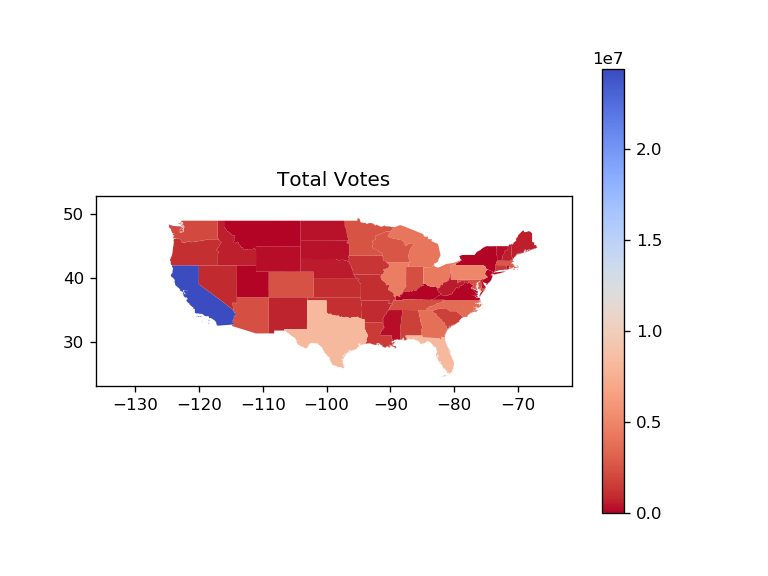

Text(0.5,1,'Total Votes')

In [82]:
incar_merge.plot(column='totalvotes', cmap='coolwarm_r', legend=True)
plt.title("Total Votes")

<IPython.core.display.Javascript object>


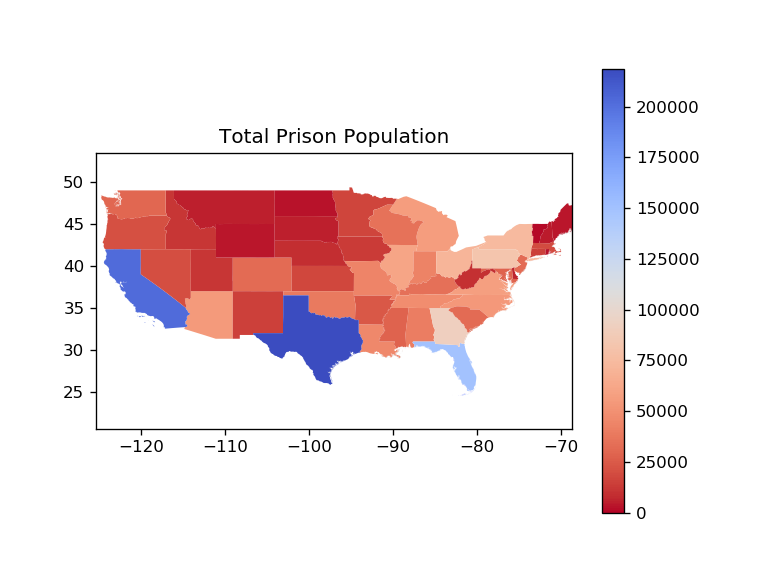

Text(0.5,1,'Total Prison Population')

In [93]:
incar_merge.plot(column='total_prison', cmap='coolwarm_r', legend=True)
plt.title("Total Prison Population")

<IPython.core.display.Javascript object>


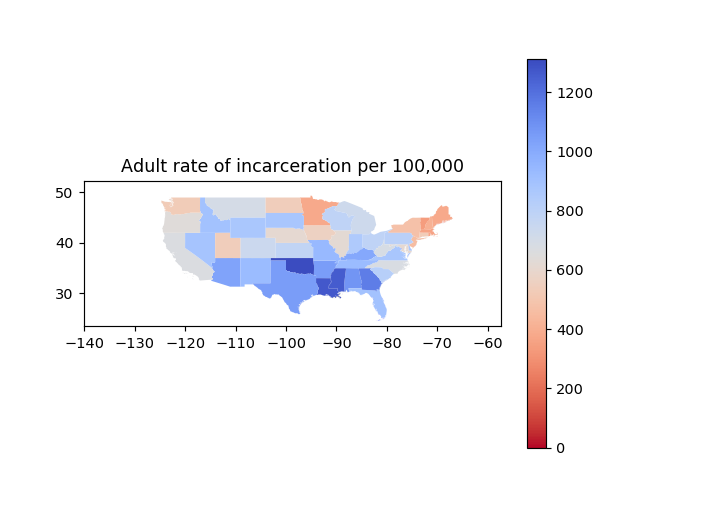

Text(0.5,1,'Adult rate of incarceration per 100,000')

In [111]:
incar_merge.plot(column='adult_rate_100', cmap='coolwarm_r', legend=True)
plt.title("Adult rate of incarceration per 100,000")

In [99]:
incar_merge['adult_rate_100'].value_counts()

880      3
380      2
540      2
930      2
1,050    2
790      2
900      2
530      2
610      2
670      1
480      1
500      1
360      1
460      1
890      1
370      1
730      1
780      1
820      1
560      1
340      1
850      1
940      1
620      1
410      1
1,010    1
1,260    1
700      1
1,160    1
680      1
1,270    1
690      1
800      1
1,310    1
1,030    1
810      1
640      1
740      1
870      1
1,080    1
0        1
Name: adult_rate_100, dtype: int64

In [107]:
incar_merge.total_prison = incar_merge.total_prison.str.replace(",", "")

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [101]:
incar_merge.total_prison = incar_merge.total_prison.astype(int)

In [109]:
incar_merge['adult_rate_100'] = incar_merge['adult_rate_100'].astype(int)

In [106]:
incar_merge['adult_rate_100'].dtypes

dtype('O')

In [108]:
incar_merge['adult_rate_100'] = incar_merge['adult_rate_100'].str.replace(",", "")

In [ ]:
tot_votes = state_votes.groupby(['state', 'party'])['candidatevotes'].sum().reset_index()

In [ ]:
state_votes.stage.value_counts()

In [ ]:
len(state_votes)

In [ ]:
tot_votes.loc[tot_votes.state == "Connecticut"]

In [11]:
state_votes.office.value_counts()

State Representative                                     12548
State Senator                                             4563
State Assembly Member                                     1355
State Senate                                               588
House of Delegates Member                                  307
State Assembly Representative                              274
State House Delegate                                       207
Supreme Court Justice                                      187
Governor                                                   172
Attorney General                                           137
Secretary of State                                         128
State Representative Pos. 1                                 92
State Representative Pos. 2                                 90
Lieutenant Governor                                         72
State Treasurer                                             68
State Board of Education Member                        